In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load the data

In [7]:
data = {
    "Region": ["North", "North", "South", "South", "East", "East", "West", "West"],
    "Age Group": ["16-18", "19-30", "16-18", "19-30", "16-18", "19-30", "16-18", "19-30"],
    "Prevalence Rate (%)": [5.086665, 13.876478, 7.371041, 16.621933, 14.542065, 6.455874, 13.514167, 6.905040],
    "Vaccination Rate (%)": [63.483873, 77.510092, 44.602158, 50.335887, 73.110694, 79.996429, 44.561985, 89.252547]
}

df= pd.DataFrame(data)
print(df.head())

  Region Age Group  Prevalence Rate (%)  Vaccination Rate (%)
0  North     16-18             5.086665             63.483873
1  North     19-30            13.876478             77.510092
2  South     16-18             7.371041             44.602158
3  South     19-30            16.621933             50.335887
4   East     16-18            14.542065             73.110694


Statistics

In [6]:
print(df.describe())

       Prevalence Rate (%)  Vaccination Rate (%)
count             8.000000              8.000000
mean             10.546658             65.356708
std               4.514390             17.260467
min               5.086665             44.561985
25%               6.792749             48.902455
50%              10.442604             68.297283
75%              14.042875             78.131676
max              16.621933             89.252547


Grouping by region and age group

In [9]:
region_age_group_stats = df.groupby(["Region", "Age Group"]).mean()
print(region_age_group_stats)

                  Prevalence Rate (%)  Vaccination Rate (%)
Region Age Group                                           
East   16-18                14.542065             73.110694
       19-30                 6.455874             79.996429
North  16-18                 5.086665             63.483873
       19-30                13.876478             77.510092
South  16-18                 7.371041             44.602158
       19-30                16.621933             50.335887
West   16-18                13.514167             44.561985
       19-30                 6.905040             89.252547


Bar plot for prevalence rate

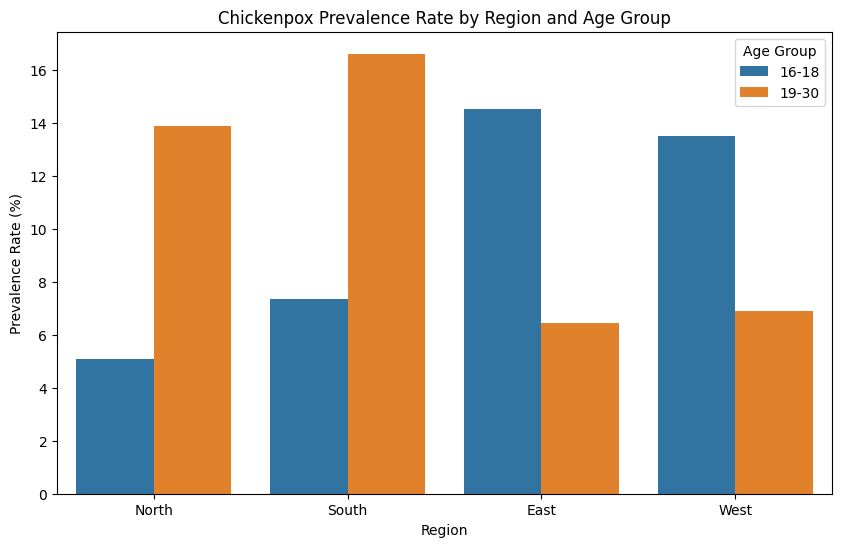

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Prevalence Rate (%)", data=df, hue="Age Group")
plt.title("Chickenpox Prevalence Rate by Region and Age Group")
plt.show()

Bar Plot for Vaccination Rate

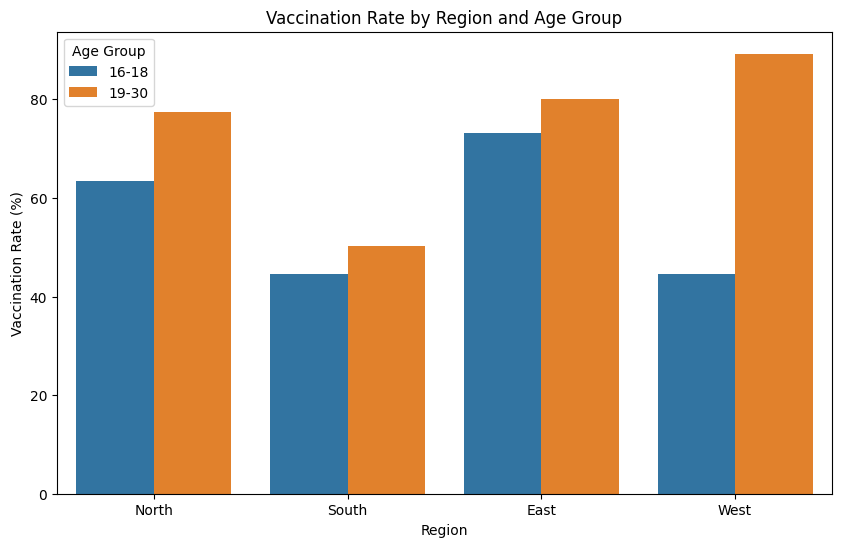

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Vaccination Rate (%)", data=df, hue="Age Group")
plt.title("Vaccination Rate by Region and Age Group")
plt.show()

Scatter Plot: Vaccination Rate vs Prevalence Rate

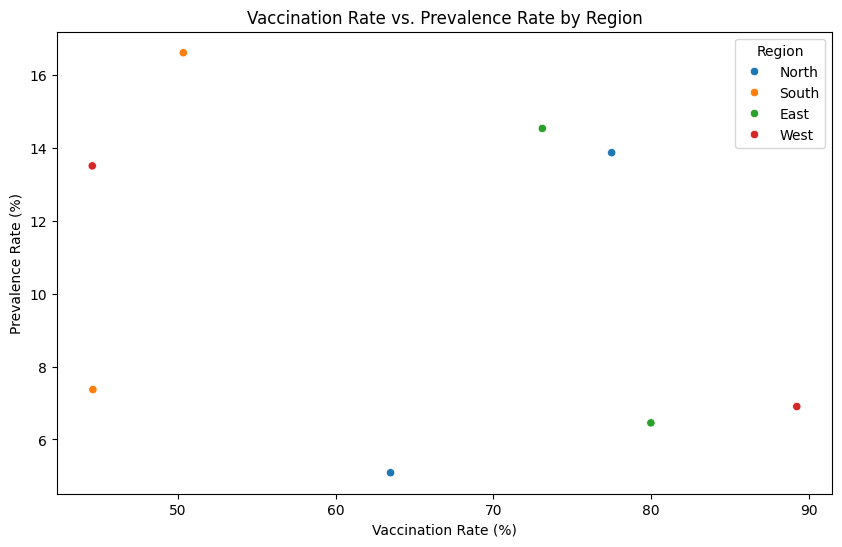

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Vaccination Rate (%)", y="Prevalence Rate (%)", data=df, hue="Region")
plt.title("Vaccination Rate vs. Prevalence Rate by Region")
plt.show()

Correlation Analysis

In [15]:
correlation = df["Vaccination Rate (%)"].corr(df["Prevalence Rate (%)"])
print("Correlation between Vaccination Rate and Prevalence Rate:", correlation)

Correlation between Vaccination Rate and Prevalence Rate: -0.27920135337171814


Predictive Model (Linear Regression)

In [16]:
X = df[["Vaccination Rate (%)"]]
y = df["Prevalence Rate (%)"]

model = LinearRegression()
model.fit(X, y)
predicted = model.predict(X)

Visualize the model prediction

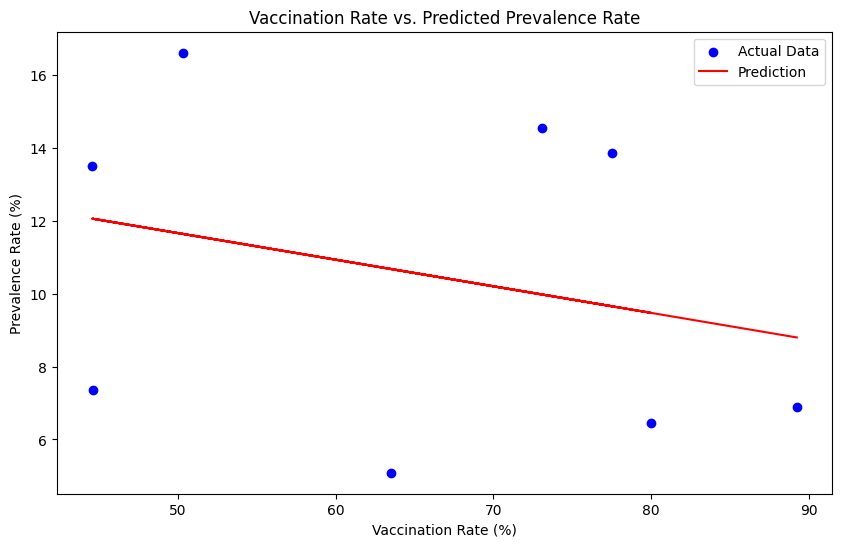

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predicted, color='red', label='Prediction')
plt.title("Vaccination Rate vs. Predicted Prevalence Rate")
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Prevalence Rate (%)")
plt.legend()
plt.show()